# 感知机模型

+ 输入空间 $X \subseteq R^{n}$
+ 输入变量 $x \in X$
+ 输出空间 $Y=\{+1,-1\}$
+ 输出变量 $y \in\{+1,-1\}$
+ 假设空间 $f(x)=\operatorname{sign}(w \cdot x+b)$
![感知机模型](./img/2_1.png)

# 感知机学习策略

+ 误分类点到超平面的总距离
    $$
d = \frac{-y_{i}\left(w \cdot x_{i}+b\right)}{\|w\|}
$$
+ 损失函数
    $$
L(w, b)=-\sum_{x_{i} \in M} y_{i}\left(w \cdot x_{i}+b\right)
$$
+ 学习策略 $minL(w, b)$

# 感知机学习算法

## 算法1： 随机梯度下降法
![](./2_2.png)

## 算法2：感知机模型对偶形式
![](./2_3.png)

# 作业

1. 思考感知机模型假设空间是什么？模型复杂度体现在哪里？
2. 已知训练数据集D，其正实例点是$x_1=(3,3)^T$,$x_2=(4,3)^T$，负实例点是$x_3=(1,1)^T$:
    + (1) 用python 自编程实现感知机模型，对训练数据集进行分类，并对比误分类点选择次序不同对最终结果的影响。可采用函数式编程或面向对象的编程。
    + (2)试调用sklearn.linear_model 的Perceptron模块，对训练数据集进行分类，并对比不同学习率h对模型学习速度及结果的影响。
    + (3)附加题：
 对比传统感知机算法及其对偶形式的运行速度。

## 思考感知机模型假设空间是什么？模型复杂度体现在哪里？
    + 假设空间
> 感知机是一种线性分类模型，属于判别模型。其假设空间实在定义特征空间中所有线性分类模型，即$wx+b$  
    $$f(x)=sign(wx + b)$$  
    
    + 模型复杂度  
    模型复杂度体现在所有实例的特征数量，也就是特征维度上。

## 已知训练数据集D，其正实例点是$x_1=(3,3)^T$,$x_2=(4,3)^T$，负实例点是$x_3=(1,1)^T$:

### 用python 自编程实现感知机模型，对训练数据集进行分类，并对比误分类点选择次序不同对最终结果的影响。可采用函数式编程或面向对象的编程。

In [226]:
import numpy as np
class Perceptron(object):
    def __init__(self, lr, X, Y):
        self.lr = lr
        self.x = X
        self.y = Y
    def param_init(self, seed=0):
        np.random.seed(seed)
        lens = len(self.x[0])
        w = np.random.rand(lens)
        return w
    def choice(self, ix):
        return self.x[ix], self.y[ix]
    
    def check_all(self, w, b):
        for ix, arr in enumerate(self.x):
            x = arr
            y = self.y[ix]
            result = y * (np.dot(w.T, x) + b)
            while result <= 0:
                w += self.lr * y * x
                b += self.lr * y
                w, b, result = self.check_all(w, b)       
        return w, b, result
        
    def fit(self, ix):
        w = self.param_init()
        b = 0
        x, y = self.choice(ix)
        result = y * (np.dot(w.T, x) + b)
        w, b, result = self.check_all(w, b)
        return w, b

In [227]:
X = np.array([[3, 3], [4, 3], [1, 1]])
Y = np.array([1, 1, -1])
p = Perceptron(0.5, X, Y)

(array([0.0488135 , 0.21518937]), -0.5)

(array([0.0488135 , 0.21518937]), -0.5)

(array([0.0488135 , 0.21518937]), -0.5)

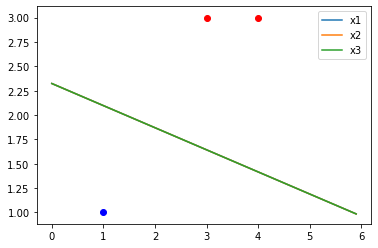

In [228]:
for ix, y in enumerate(Y):
    if y == 1:
        plt.scatter(X[ix][0], X[ix][1], c='r')
    else:
        plt.scatter(X[ix][0], X[ix][1], c='b')

w0, b0 = p.fit(0)
w0, b0
x1 = np.arange(0, 6, 0.1)
x2 = (w0[0] * x1 + b0) / (-w0[1])
plt.plot(x1, x2, label='x1')
w1, b1 = p.fit(1)
w1, b1
x1 = np.arange(0, 6, 0.1)
x2 = (w1[0] * x1 + b1) / (-w1[1])
plt.plot(x1, x2, label='x2')
w2, b2 = p.fit(2)
w2, b2
x1 = np.arange(0, 6, 0.1)
x2 = (w2[0] * x1 + b2) / (-w2[1])
plt.plot(x1, x2, label='x3')
plt.legend()

### 试调用sklearn.linear_model 的Perceptron模块，对训练数据集进行分类，并对比不同学习率h对模型学习速度及结果的影响。

In [230]:
from sklearn.linear_model import Perceptron

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=0.1,
           fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=0, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=0.2,
           fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=0, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False,
           eta0=0.30000000000000004, fit_intercept=True, max_iter=1000,
           n_iter_no_change=5, n_jobs=None, penalty=None, random_state=0,
           shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
           warm_start=False)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=0.4,
           fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=0, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=0.5,
           fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=0, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=0.6,
           fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=0, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False,
           eta0=0.7000000000000001, fit_intercept=True, max_iter=1000,
           n_iter_no_change=5, n_jobs=None, penalty=None, random_state=0,
           shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
           warm_start=False)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=0.8,
           fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=0, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=0.9,
           fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=0, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

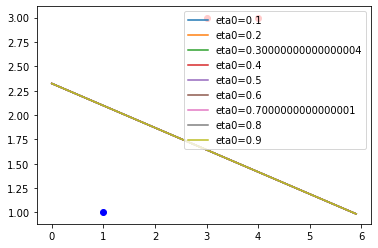

In [231]:
for ix, y in enumerate(Y):
    if y == 1:
        plt.scatter(X[ix][0], X[ix][1], c='r')
    else:
        plt.scatter(X[ix][0], X[ix][1], c='b')
for eta0 in np.arange(0.1, 1, 0.1):
    p = Perceptron(eta0=eta0)
    p.fit(X, Y)
    w = p.coef_ 
    b = p.intercept_
    x1 = np.arange(0, 6, 0.1)
    x2 = (w0[0] * x1 + b0) / (-w0[1])
    plt.plot(x1, x2, label=f'eta0={eta0}')
plt.legend()

# 作业
![](./img/2_zuoye_1.png)
![](./img/2_zuoye_2.png)
![](./img/2_zuoye_3.png)